# LS - Markov - GT

In [10]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib.patches as mpatches
import sys
sys.path.append('../..')
from data_import import*
from helper import*
from plot_params import*
pp = PlotParams()
from paths import*
paths = paths()

In [11]:
f4_path = paths.f4_path + '4e9c1cf/'
figsave_path = paths.plot_save_path +'CT_GT_Markov/'

In [32]:
LS = pd.read_csv(paths.local_data + '/LS_mean_D5_D8_recalc.csv')
LS.set_index('participant', inplace = True)

In [13]:
data_raw = import_and_transform_data(f4_path, 'NOGTHSH_LEARNING_CURVES_4e9c1cf_9A_23_09_05.csv')
data_tag, data_raw = data_raw

In [33]:
#####################
## Filter data
data = drop_RTs_above_3std_below_180(data_raw)
data.shape

(2629321, 22)

In [34]:
corr_matrix = (data
                   .groupby(['model', 'participant', 'e_train', 'e_test', 'day'])
                   [['rt','rt_predicted']]
                   .corr())
corr_matrix.reset_index(inplace = True)
corr_matrix.drop(['level_5','rt'], axis = 1, inplace = True)
matrix = corr_matrix.loc[corr_matrix['rt_predicted'] !=1]
matrix['r_sqr'] = matrix.rt_predicted**2
matrix.drop('rt_predicted', axis = 1, inplace = True)
matrix;

In [35]:
data_ct_m =  matrix.pivot(index = ['participant', 'day'], columns = 'model', values = 'r_sqr')
data_ct_m['m_ct_diff'] = data_ct_m['iHMM'] - data_ct_m['Markov'] 

## Markov, CT, IHMM on D8 vs. LS

In [36]:
data_ct_m.reset_index('day', inplace = True)
data_ct_m_D8 = data_ct_m.loc[data_ct_m['day'] == 8]

In [37]:
LS.rename(columns = {'m_ct_diff': 'LS'}, inplace=True)
LS.index

Index([110, 131, 118, 101, 129, 128, 103, 107, 127, 123, 120, 126, 105, 124,
       109, 102, 132, 121, 122, 117, 130, 104, 115, 111, 119],
      dtype='int64', name='participant')

In [38]:
data = data_ct_m_D8.join(LS)

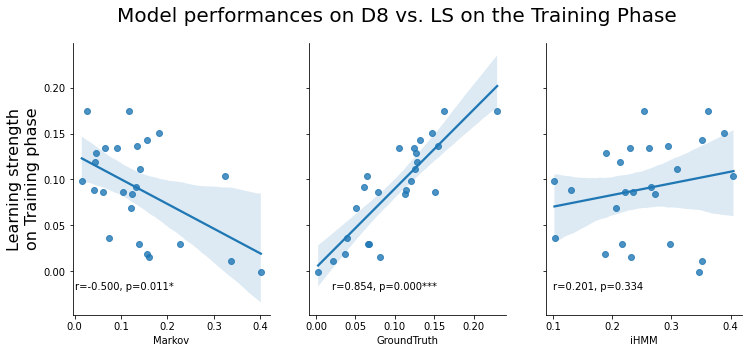

In [39]:
fig, axs = plt.subplots(1,3, sharey = True, figsize = (12, 5))
y = 'LS_mean_d5_d8'

x = 'Markov'
sns_plot = sns.regplot(ax = axs[0], data = data, x = x, y = y)
r, p = sp.stats.pearsonr(x=data[x], y=data[y])
sns_plot.text(0, -0.02, 'r={:.3f}, p={:.3f}{}'.format(r, p, get_stars(p)))


x = 'GroundTruth'
sns_plot = sns.regplot(ax = axs[1], data = data, x = x, y = y)
r, p = sp.stats.pearsonr(x=data[x], y=data[y])
sns_plot.text(0.02, -0.02, 'r={:.3f}, p={:.3f}{}'.format(r, p, get_stars(p)))


x = 'iHMM'
sns_plot = sns.regplot(ax = axs[2], data = data, x = x, y = y)
r, p = sp.stats.pearsonr(x=data[x], y=data[y])
sns_plot.text(0.1, -0.02, 'r={:.3f}, p={:.3f}{}'.format(r, p, get_stars(p)))

for ax in fig.axes:

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_ylabel(None)


axs[0].set_ylabel('Learning strength\non Training phase', fontsize = 16);
fig.suptitle('Model performances on D8 vs. LS on the Training Phase', fontsize = 20);

In [40]:
# fig.savefig(figsave_path +'LS_Markov_GT_CT.png', bbox_inches='tight')

r=-0.500, p=0.011*


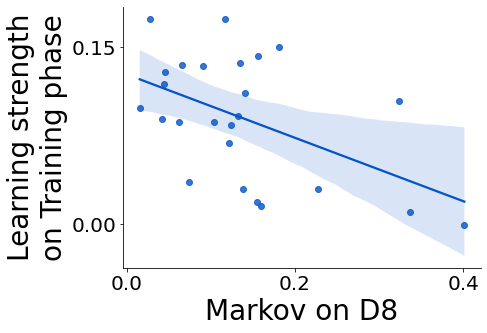

In [41]:
fig, axs = plt.subplots(1, 1, sharey = True, figsize = pp.figsize, facecolor ='white')
y = 'LS_mean_d5_d8'

x = 'Markov'
sns_plot = sns.regplot(data = data, x = x, y = y, color = pp.basic_color)
r, p = sp.stats.pearsonr(x=data[x], y=data[y])
#sns_plot.text(0, -0.02, 'r={:.3f}, p={:.3f}{}'.format(r, p, get_stars(p)))



sns_plot.spines.right.set_visible(False)
sns_plot.spines.top.set_visible(False)

sns_plot.set_yticks([0, 0.15])
sns_plot.set_yticklabels(['0.00', 0.15], fontsize = pp.ticklabsize)
sns_plot.set_xticks([0.0, 0.2, 0.4])
sns_plot.set_xticklabels([0.0, 0.2, 0.4], fontsize = pp.ticklabsize)


axs.set_ylabel('Learning strength\non Training phase', fontsize = pp.axlabsize);
axs.set_xlabel('Markov on D8', fontsize = pp.axlabsize);
print('r={:.3f}, p={:.3f}{}'.format(r, p, get_stars(p)))

In [42]:
fig.savefig(paths.plot_save_path + '/manuscript_plots_standard/' +'LS-Markov.pdf', bbox_inches='tight')
fig.savefig(paths.plot_save_path + '/manuscript_plots_standard/' +'LS-Markov.png', bbox_inches='tight')

## Markov vs. GT on D8

r=-0.568, p=0.003**


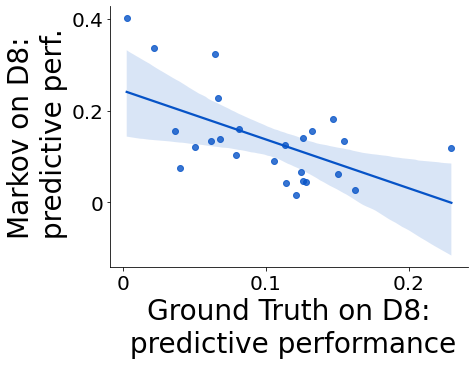

In [44]:
fig, axs = plt.subplots(1,1, sharey = True, figsize = pp.figsize)
y = 'Markov'
x = 'GroundTruth'
sns_plot = sns.regplot(data = data, x = x, y = y, color = pp.basic_color)
r, p = sp.stats.pearsonr(x=data[x], y=data[y])

sns_plot.set_ylabel('Markov on D8:\n predictive perf.', fontsize = pp.axlabsize)
sns_plot.set_xlabel('Ground Truth on D8:\n predictive performance', fontsize = pp.axlabsize)

sns_plot.set_xticks([0, 0.1, 0.2])
sns_plot.set_xticklabels([0, 0.1, 0.2], fontsize = pp.ticklabsize)

sns_plot.set_yticks([0, 0.2, 0.4])
sns_plot.set_yticklabels([0, 0.2, 0.4], fontsize = pp.ticklabsize)


for ax in fig.axes:

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    
    
# sns_plot.set_title('Correlation of the\nMarkov and Ground Truth\nmodels\' predictive power', 
#                    fontsize = pp.titlefontsize)

    
    
#sns_plot.text(0, -0.02, 'r={:.3f}, p={:.3f}{}'.format(r, p, get_stars(p)))
print('r={:.3f}, p={:.3f}{}'.format(r, p, get_stars(p)))

In [45]:
#fig.savefig(figsave_loc +'LS_GT', bbox_inches='tight')

In [46]:
fig.savefig(paths.plot_save_path + '/manuscript_plots_standard/' +'GT-Markov.pdf', bbox_inches='tight')
fig.savefig(paths.plot_save_path +'/manuscript_plots_standard/' +'GT-Markov.png', bbox_inches='tight')

## Markov vs. GT change D1 - D8

In [47]:
data_ct_m_D1D8 = data_ct_m.loc[data_ct_m['day'].isin([1, 8])]
data_ct_m_D1D8.reset_index(inplace = True)
data_ct_m_D1D8 = data_ct_m_D1D8.groupby(['day','participant']).sum()
data_ct_m_D1D8 = data_ct_m_D1D8.unstack(0)
D1D8_change = pd.DataFrame({})

In [48]:
D1D8_change['GT_change'] = data_ct_m_D1D8[('GroundTruth', 8)] - data_ct_m_D1D8[('GroundTruth', 1)]
D1D8_change['Markov_change'] = data_ct_m_D1D8[('Markov', 8)] - data_ct_m_D1D8[('Markov', 1)]

r=-0.527, p=0.007**


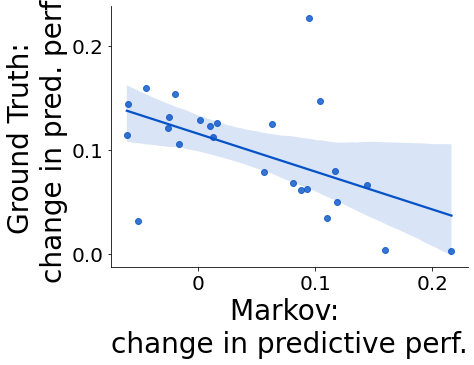

In [49]:
fig, axs = plt.subplots(1,1, sharey = True, figsize = pp.figsize)
y = 'GT_change'
x = 'Markov_change'
sns_plot = sns.regplot(data = D1D8_change, x = x, y = y, color = pp.basic_color)
r, p = sp.stats.pearsonr(x=D1D8_change[x], y=D1D8_change[y])


sns_plot.set_xlabel('Markov: \nchange in predictive perf.', fontsize = pp.axlabsize)
sns_plot.set_ylabel('Ground Truth:\nchange in pred. perf.', fontsize = pp.axlabsize)



sns_plot.set_xticks([0, 0.1, 0.2])
sns_plot.set_xticklabels([0, 0.1, 0.2], fontsize = pp.ticklabsize)

sns_plot.set_yticks([0.00, 0.10, 0.20])
sns_plot.set_yticklabels([0.00, 0.10, 0.20], fontsize = pp.ticklabsize)


for ax in fig.axes:

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)


print('r={:.3f}, p={:.3f}{}'.format(r, p, get_stars(p)))

In [50]:
#fig.savefig(figsave_loc +'Markov_GT_change_D1_D8', bbox_inches='tight')

In [52]:
fig.savefig(paths.plot_save_path + '/manuscript_plots_standard/' +'Change_in_GT_Markov.pdf', bbox_inches='tight')
fig.savefig(paths.plot_save_path + '/manuscript_plots_standard/' +'Change_in_GT_Markov.png', bbox_inches='tight')